In [27]:
import preprocessing.preprocessing as pp
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec, KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicolas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicolas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/nicolas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pp.load_data("english_cleaned_lyrics.csv")
df = pp.preprocess_data(df)
df = df[['lyrics', 'genre']]
df

,lyrics,genre
0,oh baby know im gonna cut right chase woman ma...,Pop
1,playin everything easy like seem sure still wa...,Pop
2,search tenderness isnt hard find love need liv...,Pop
3,oh oh oh oh oh oh wrote book stand title book ...,Pop
4,party people people party popping sitting arou...,Pop
...,...,...
218205,gotta say boy couple date youre hand outright ...,Country
218206,helped find diamond ring made try everything t...,Country
218207,look couple corner booth look lot like shes lo...,Country
218208,fly mortal earth im measured depth girth fathe...,Country


In [6]:
X = df['lyrics'].to_list()
y = df['genre'].to_list()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Features dimension: {len(X_train)} samples, sample 1: {X_train[0]}")

Features dimension: 174568 samples, sample 1: lonely im lonely man gainesville aint got nowhere go got nowhere go said dont want doin wrong land yes blood growin cold cold gettin colder yeah believe people street take time time stare lonely eye thinkin im nowhere lord wasnt born wasnt born wander aimlessly lord cant dont want destiny lord woman come help oh wish could find turkey need good sweet love yeah gotta go quack quack oh baby would know heart would lucky thats way go yeah fine yeah wanna tell people street take time stare see eye thinkin im nowhere lord wasnt born wasnt born wander round aimlessly cant cant dont want destiny lord take ahold


In [17]:
#model = make_pipeline(CountVectorizer(tokenizer=word_tokenize, ngram_range = (1,1)), LogisticRegression(random_state=42, class_weight='balanced', penalty = 'l2', max_iter = 1000))
model = make_pipeline(CountVectorizer(tokenizer=word_tokenize, ngram_range = (1,1)), TfidfTransformer(), LogisticRegression(random_state=42, class_weight='balanced', penalty = 'l2', max_iter = 1000))

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Country       0.33      0.56      0.42      2794
  Electronic       0.11      0.34      0.16      1291
        Folk       0.06      0.28      0.09       364
     Hip-Hop       0.79      0.77      0.78      4490
       Indie       0.05      0.30      0.09       588
        Jazz       0.23      0.46      0.31      1483
       Metal       0.52      0.75      0.61      4208
       Other       0.07      0.19      0.10       734
         Pop       0.40      0.28      0.33      6885
         R&B       0.08      0.34      0.13       688
        Rock       0.75      0.23      0.36     20117

    accuracy                           0.38     43642
   macro avg       0.31      0.41      0.31     43642
weighted avg       0.58      0.38      0.40     43642



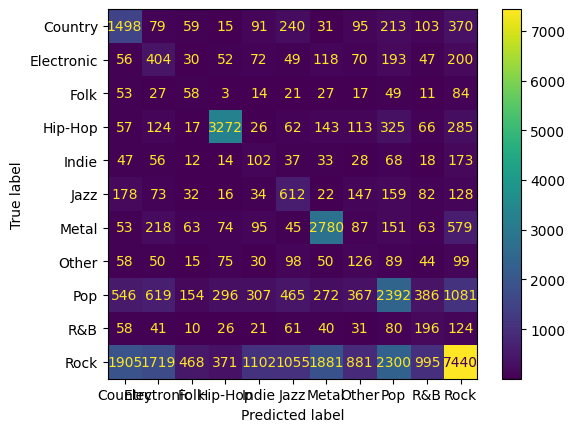

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

# Change distribution

In [20]:
df = pp.adjust_genre_distribution(df)
df

,lyrics,genre
0,oh baby know im gonna cut right chase woman ma...,Pop
1,playin everything easy like seem sure still wa...,Pop
2,search tenderness isnt hard find love need liv...,Pop
3,oh oh oh oh oh oh wrote book stand title book ...,Pop
4,party people people party popping sitting arou...,Pop
...,...,...
218205,gotta say boy couple date youre hand outright ...,Country/Folk
218206,helped find diamond ring made try everything t...,Country/Folk
218207,look couple corner booth look lot like shes lo...,Country/Folk
218208,fly mortal earth im measured depth girth fathe...,Country/Folk


In [23]:
X = df['lyrics'].to_list()
y = df['genre'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Features dimension: {len(X_train)} samples, sample 1: {X_train[0]}")

Features dimension: 117148 samples, sample 1: like morning keep u locked arm rose weeper easy charm fool get bus ride home lone back seat telephone fool want take world right beside want sleep whole day right beside outside theyre waiting people white cry anticipating someone fight fool want take world right beside want sleep whole day right beside want take world right beside want take world right beside


In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification Report:
                         precision    recall  f1-score   support

          Country/Folk       0.45      0.61      0.52      3089
                  Jazz       0.29      0.58      0.39      1507
                 Metal       0.64      0.78      0.70      4302
                   Pop       0.51      0.45      0.48      6750
R&B/Hip-Hop/Electronic       0.80      0.62      0.70      6664
                  Rock       0.50      0.41      0.45      6976

              accuracy                           0.55     29288
             macro avg       0.53      0.58      0.54     29288
          weighted avg       0.58      0.55      0.55     29288



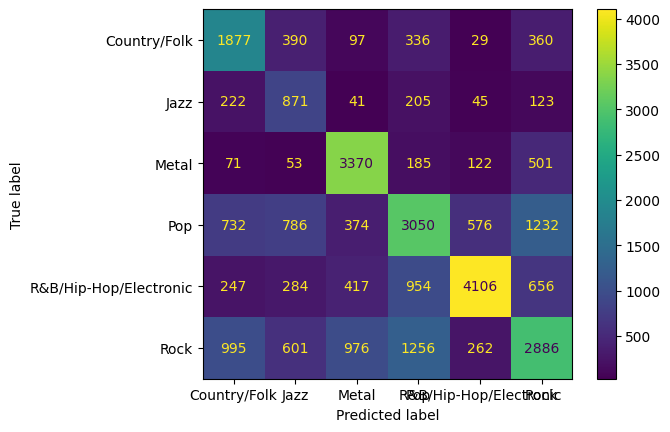

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

# We have better results, now let's do a grid search on it 

In [26]:
param_grid = {
    'logisticregression__C': [0.1, 1.0, 10.0],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__penalty': ['l2', 'none']
}

In [28]:
# Create the pipeline
pipe = Pipeline([
    ('countvectorizer', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))),
    ('tfidfransformer', TfidfTransformer()),
    ('logisticregression', LogisticRegression(random_state=42, class_weight='balanced', penalty='l2', max_iter=1000))
])

# Create the grid search object
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search object to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: Use

Best parameters:  {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best score:  0.5413580364866093


In [29]:
best_model = grid_search.best_estimator_

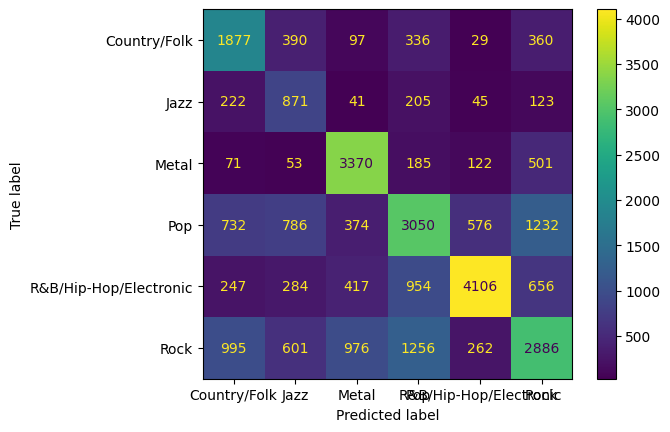

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_model.classes_)
disp.plot()
plt.show()

# Trying the model with stopwords

In [39]:
df = pp.load_data("english_cleaned_lyrics.csv")
df = pp.preprocess_data(df, remove_stops=False)
df = df[['lyrics', 'genre']]
df

,lyrics,genre
0,oh baby how you doing you know im gonna cut ri...,Pop
1,playin everything so easy it like you seem so ...,Pop
2,if you search for tenderness it isnt hard to f...,Pop
3,oh oh oh i oh oh oh i if i wrote a book about ...,Pop
4,party the people the people the party it poppi...,Pop
...,...,...
218205,i gotta say boy after only just a couple of da...,Country
218206,i helped you find her diamond ring you made me...,Country
218207,look at the couple in the corner booth look a ...,Country
218208,when i fly off this mortal earth and im measur...,Country


In [40]:
df = pp.adjust_genre_distribution(df)
df

,lyrics,genre
0,oh baby how you doing you know im gonna cut ri...,Pop
1,playin everything so easy it like you seem so ...,Pop
2,if you search for tenderness it isnt hard to f...,Pop
3,oh oh oh i oh oh oh i if i wrote a book about ...,Pop
4,party the people the people the party it poppi...,Pop
...,...,...
218205,i gotta say boy after only just a couple of da...,Country/Folk
218206,i helped you find her diamond ring you made me...,Country/Folk
218207,look at the couple in the corner booth look a ...,Country/Folk
218208,when i fly off this mortal earth and im measur...,Country/Folk


In [41]:
X = df['lyrics'].to_list()
y = df['genre'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"Features dimension: {len(X_train)} samples, sample 1: {X_train[0]}")

Features dimension: 117148 samples, sample 1: there must be something in the sign were reading there must be something in the story of our history when will you start to take the time youre needing when will i start to heed the lesson of my history well i saw it coming them knocking down the window when all that you wanted wa someone to wake you in the morning do you still wear the robe of all the dream you wove or do you cast them aside when youre through ive been waiting for the answer i slept in the shadow of your father i saw his work and i dont want his history well you sought the counsel of your mother you heard her story and you saw your history and she still remembers them knocking down the window when all that she wanted wa someone to hold her when the night came doe she still wear the robe of all the dream she wove or doe she cast them aside when shes through ive been waiting for the answer


In [43]:
model = make_pipeline(CountVectorizer(tokenizer=word_tokenize, ngram_range = (1,1)), TfidfTransformer(), LogisticRegression(random_state=42, class_weight='balanced', penalty = 'l2', max_iter = 1000))

In [44]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

          Country/Folk       0.46      0.60      0.52      3134
                  Jazz       0.28      0.55      0.37      1477
                 Metal       0.66      0.78      0.71      4282
                   Pop       0.52      0.47      0.49      6780
R&B/Hip-Hop/Electronic       0.79      0.62      0.70      6659
                  Rock       0.50      0.42      0.46      6956

              accuracy                           0.55     29288
             macro avg       0.53      0.57      0.54     29288
          weighted avg       0.58      0.55      0.56     29288



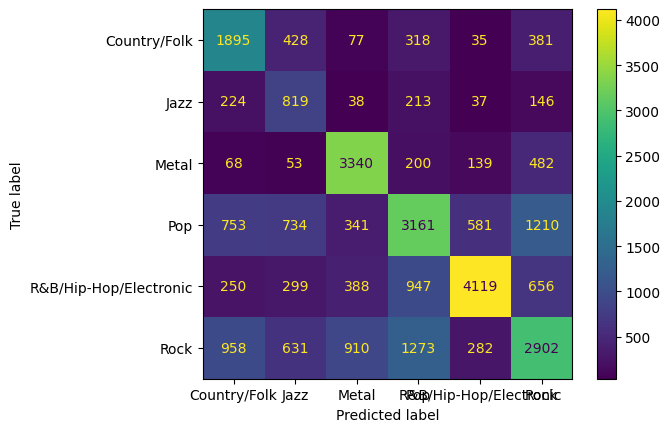

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

# Lets' try with another tokenizer (BPE)

In [46]:
model = make_pipeline(CountVectorizer(tokenizer=pp.tokenize_bpe, ngram_range = (1,1)), TfidfTransformer(), LogisticRegression(random_state=42, class_weight='balanced', penalty = 'l2', max_iter = 1000))

In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification Report:
                         precision    recall  f1-score   support

          Country/Folk       0.45      0.60      0.51      3134
                  Jazz       0.27      0.56      0.36      1477
                 Metal       0.65      0.78      0.71      4282
                   Pop       0.52      0.46      0.49      6780
R&B/Hip-Hop/Electronic       0.79      0.61      0.69      6659
                  Rock       0.49      0.41      0.45      6956

              accuracy                           0.55     29288
             macro avg       0.53      0.57      0.54     29288
          weighted avg       0.57      0.55      0.55     29288



In [48]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

/home/nicolas/Prog/python-projects/NLP/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification Report:
                         precision    recall  f1-score   support

          Country/Folk       0.45      0.60      0.51      3134
                  Jazz       0.27      0.56      0.36      1477
                 Metal       0.65      0.78      0.71      4282
                   Pop       0.52      0.46      0.49      6780
R&B/Hip-Hop/Electronic       0.79      0.61      0.69      6659
                  Rock       0.49      0.41      0.45      6956

              accuracy                           0.55     29288
             macro avg       0.53      0.57      0.54     29288
          weighted avg       0.57      0.55      0.55     29288



In [1]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

NameError: name 'confusion_matrix' is not defined